<a href="https://colab.research.google.com/github/natkins14/FastF1-F1-Data-Analytics/blob/main/Tire_Strategies_During_a_Race_FastF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.13.0 requires websockets<16.0.0,>=15.0.1, but you have websockets 13.1 which is incompatible.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


In [2]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

2024 Signapore Grand Prix Tire Strategies

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
events      WARNING 	Correcting user input 'Signapore' to 'Singapore Grand Prix'
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Singapore Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been writte

['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24', '77', '10', '3', '20', '23']
['NOR', 'VER', 'PIA', 'RUS', 'LEC', 'HAM', 'SAI', 'ALO', 'HUL', 'PER', 'COL', 'TSU', 'OCO', 'STR', 'ZHO', 'BOT', 'GAS', 'RIC', 'MAG', 'ALB']
   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM           11
1     ALB    2.0     HARD            4
2     ALO    1.0   MEDIUM           25
3     ALO    2.0     HARD           36
4     BOT    1.0     HARD           33
5     BOT    2.0   MEDIUM           28
6     COL    1.0   MEDIUM           29
7     COL    2.0     HARD           32
8     GAS    1.0   MEDIUM           37
9     GAS    2.0     SOFT           24
10    HAM    1.0     SOFT           17
11    HAM    2.0     HARD           45
12    HUL    1.0   MEDIUM           29
13    HUL    2.0     HARD           32
14    LEC    1.0   MEDIUM           36
15    LEC    2.0     HARD           26
16    MAG    1.0     HARD           28
17    MAG    2.0   MEDIUM           21


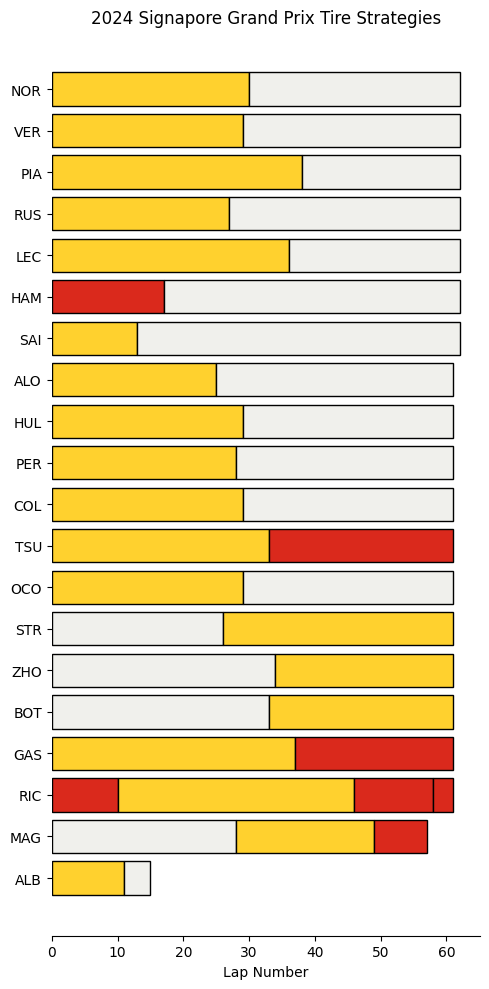

In [3]:
session = fastf1.get_session(2024, 'Signapore', 'R')
session.load()
laps = session.laps

#get list of driver numbers
drivers = session.drivers
print(drivers)

#convert driver numbers to 3 letter abbreviations
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

#find the stint length and compound used for every stint by every driver
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

#Change LapNumber column to Stint Length

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

#plot strategies for each driver

fig,ax = plt.subplots(figsize=(5,10))

for driver in drivers:
  driver_stints = stints.loc[stints["Driver"] == driver]

  previous_stint_end = 0
  for idx, row in driver_stints.iterrows():
    stint_length = row["StintLength"]
    compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                        session=session)
    plt.barh(
        y=driver,
        width=row['StintLength'],
        left=previous_stint_end,
        color=compound_color,
        edgecolor="black",
        fill=True
    )

    previous_stint_end += row["StintLength"]

#Make the Plot more readable and intuitive

plt.title("2024 Signapore Grand Prix Tire Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
ax.invert_yaxis()

#Plot Aesthetics

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()





Analysis:


*   Race predominantly a two stop, elected by 14 of 20 drivers.
*   Dominant strategy was medium/hard combination, with most stops occurring in around 25-30.
- Couple of outliers with Hamilton electing a soft/hard two stop and Tsunoda electing a medium/soft two stop.
- Overall, race suggests low degradation for hard and medium tires, many drivers were able to manage and extend these tire compounds for their projected stints.



2024 Italian Grand Prix Tire Strategies

core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
['LEC', 'PIA', 'NOR', 'SAI', 'HAM', 'VER', 'RUS', 'PER', 'ALB', 'MAG', 'ALO', 'COL', 'RIC', 'OCO', 'GAS', 'BOT', 'HUL', 'ZHO', 'STR', 'TSU']
   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM           17
1     ALB    2.0     HARD           36
2     ALO    1.0   MEDIUM           12
3     ALO    2.0     HARD           23
4     ALO    3.0     HARD           18
5     BOT    1.0     HARD           33
6     BOT    2.0   MEDIUM           19
7     COL    1.0   MEDIUM           16
8     COL    2.0     HARD           37
9     GAS    1.0   MEDIUM           10
10    GAS    2.0     HARD           20
11    GAS    3.0     HARD           22
12    HAM    1.0   MEDIUM           15
13    HAM    2.0     HARD           22
14    HAM    3.0     HARD           16
15    HUL    1.0   MEDIUM            5
16    HUL    2.0     HARD           27
17    HUL    3.0     HARD           20


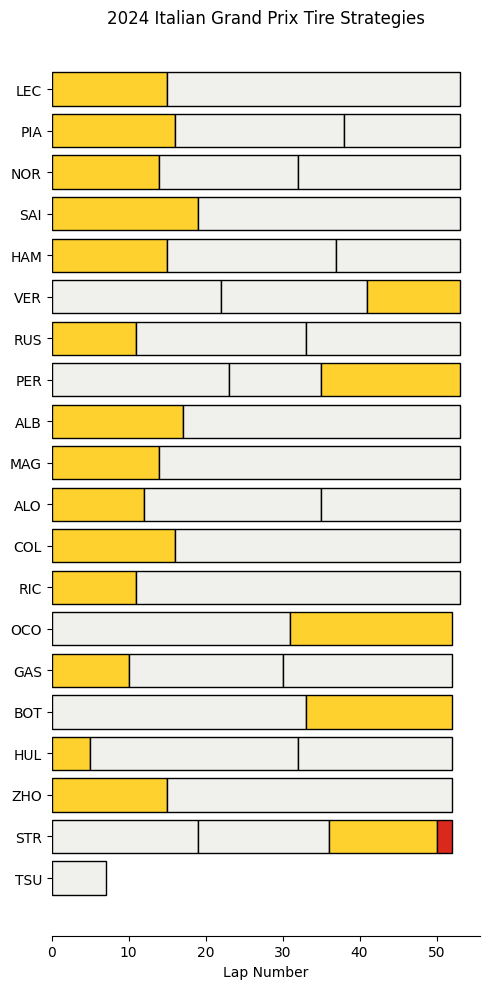

In [4]:
session = fastf1.get_session(2024, 'Monza', 'R')
session.load()
laps = session.laps

#get list of driver numbers
drivers = session.drivers
print(drivers)

#convert driver numbers to 3 letter abbreviations
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

#find the stint length and compound used for every stint by every driver
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

#Change LapNumber column to Stint Length

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

#plot strategies for each driver

fig,ax = plt.subplots(figsize=(5,10))

for driver in drivers:
  driver_stints = stints.loc[stints["Driver"] == driver]

  previous_stint_end = 0
  for idx, row in driver_stints.iterrows():
    stint_length = row["StintLength"]
    compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                        session=session)
    plt.barh(
        y=driver,
        width=row['StintLength'],
        left=previous_stint_end,
        color=compound_color,
        edgecolor="black",
        fill=True
    )

    previous_stint_end += row["StintLength"]

#Make the Plot more readable and intuitive

plt.title("2024 Italian Grand Prix Tire Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
ax.invert_yaxis()

#Plot Aesthetics

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Analysis:
- predominantly a 3 stop race, however, drivers such as Leclerc, Sainz, Albon and Magnussen made the 2 stop strategy work.
- Medium and hard tire compounds were the most prevalent tire choices, no soft runners.
- Suggests high degradation rates for the softer tire compounds, compared to the harder medium and hard tire compounds.
- Most strategies suggested the harder compounds were good for about 15-20 laps.
- Most strategies suggest the medium tire compound was only suitable for 10-15 laps.



---



**2025 Italian Grand Prix Tire Strategies**

core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

['1', '4', '81', '16', '63', '44', '23', '5', '12', '6', '55', '87', '22', '30', '31', '10', '43', '18', '14', '27']
['VER', 'NOR', 'PIA', 'LEC', 'RUS', 'HAM', 'ALB', 'BOR', 'ANT', 'HAD', 'SAI', 'BEA', 'TSU', 'LAW', 'OCO', 'GAS', 'COL', 'STR', 'ALO', 'HUL']
   Driver  Stint Compound  StintLength
0     ALB    1.0     HARD           41
1     ALB    2.0   MEDIUM           12
2     ALO    1.0   MEDIUM           20
3     ALO    2.0     HARD            4
4     ANT    1.0   MEDIUM           28
5     ANT    2.0     HARD           25
6     BEA    1.0   MEDIUM           18
7     BEA    2.0     HARD           35
8     BOR    1.0   MEDIUM           20
9     BOR    2.0     HARD           33
10    COL    1.0   MEDIUM           33
11    COL    2.0     HARD           19
12    GAS    1.0     HARD           49
13    GAS    2.0     SOFT            3
14    HAD    1.0     HARD           32
15    HAD    2.0   MEDIUM           21
16    HAM    1.0   MEDIUM           38
17    HAM    2.0     HARD           15
1

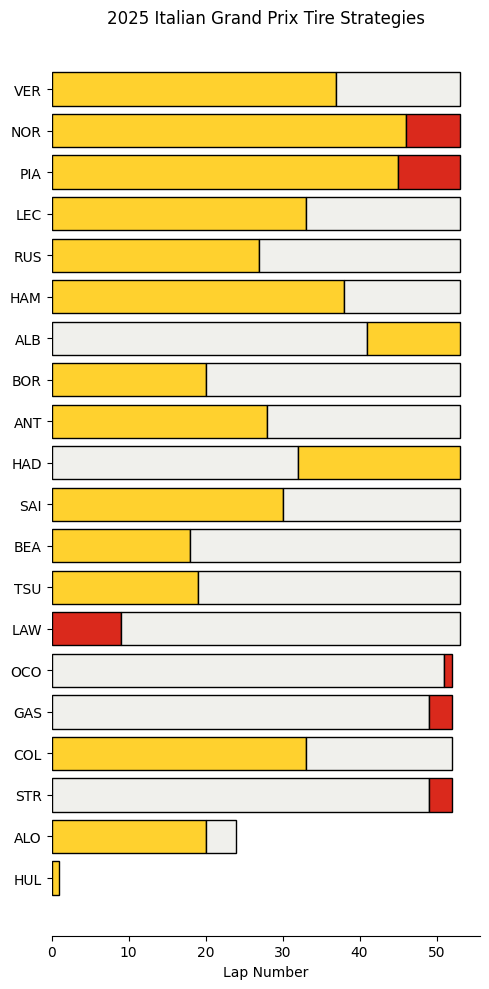

In [5]:
session = fastf1.get_session(2025, 'Monza', 'R')
session.load()
laps = session.laps

# Get list of driver numbers
drivers = session.drivers
print(drivers)

# Convert driver numbers to 3 letter abbreviations
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

# Find the stint length and compound used for every stint by every driver
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

# Change LapNumber column to Stint Length

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

#plot strategies for each driver

fig,ax = plt.subplots(figsize=(5,10))

for driver in drivers:
  driver_stints = stints.loc[stints["Driver"] == driver]

  previous_stint_end = 0
  for idx, row in driver_stints.iterrows():
    stint_length = row["StintLength"]
    compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                        session=session)
    plt.barh(
        y=driver,
        width=row['StintLength'],
        left=previous_stint_end,
        color=compound_color,
        edgecolor="black",
        fill=True
    )

    previous_stint_end += row["StintLength"]

# Make the plot more readable and intuitive

plt.title("2025 Italian Grand Prix Tire Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
ax.invert_yaxis()

#Plot Aesthetics

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

**Analysis**:


*   Race was primarily a two stop race, with medium-hard being the dominant strategy.
*   Mclaren's were the outliers and utilized a medium-soft tire strategy.

*   Few drivers elected for a soft-hard or hard-soft tire strategy.
*  Overall strategies suggest low degradation rates and less tire fall off over the course of the grand prix.


